In [2]:
from IPython.display import Image

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## skip connection 与 lr warmup 

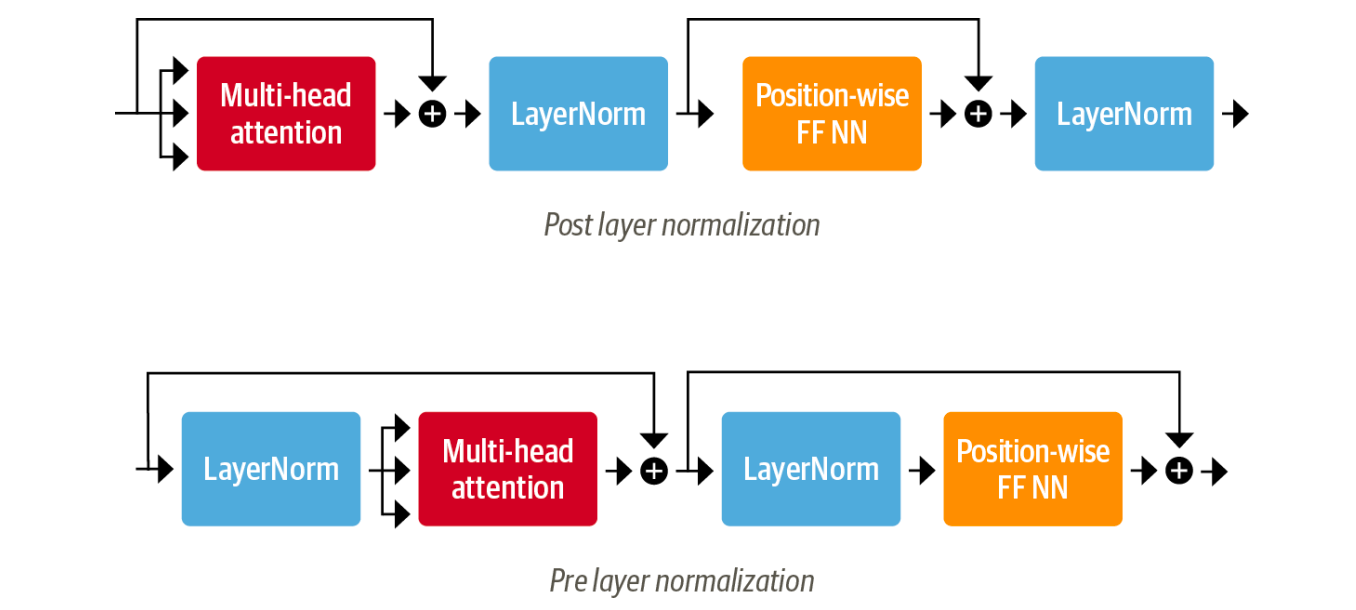

In [26]:
Image('../imgs/layer_norm_pos.png', width=500)

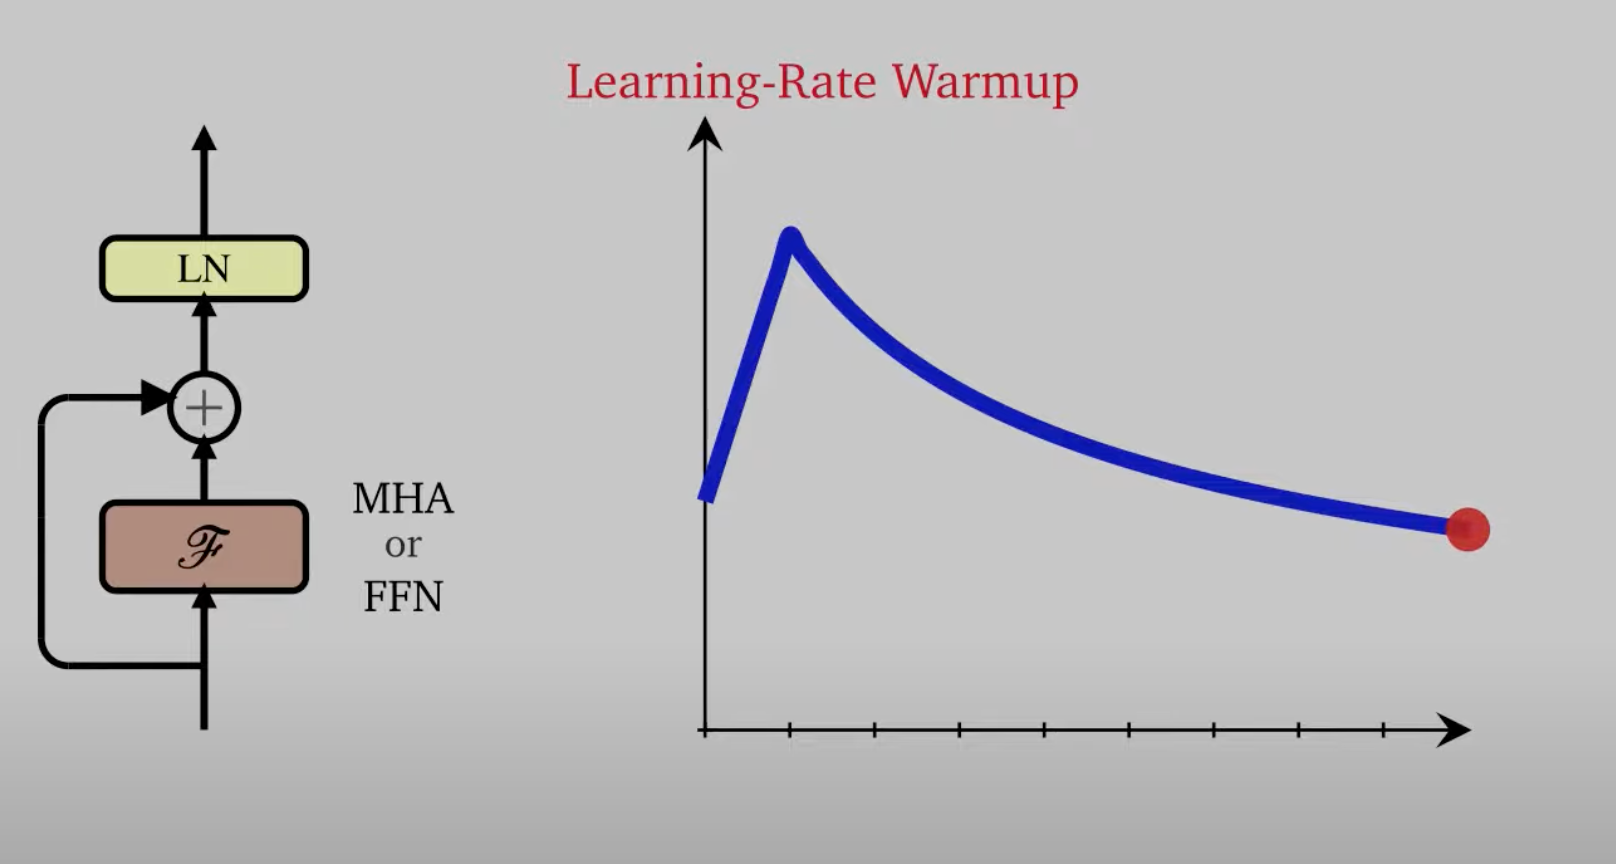

In [27]:
Image('../imgs/ln_post.png', width=500)

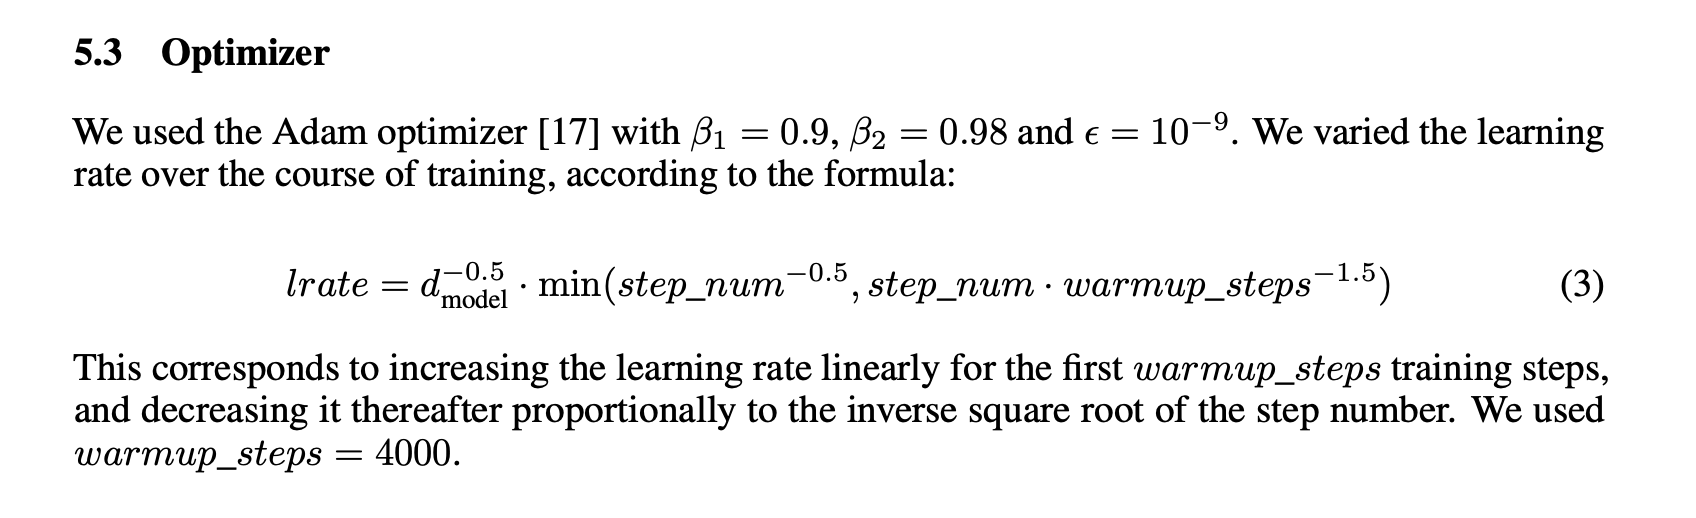

In [7]:
# https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf
Image('../imgs/warmup_scheduler.png', width=600)

In [22]:
d_model = 768
warmup_steps = 4000
lr_list = []

for n in range(1, 20000):
    lr = d_model**0.5 * min(1/np.sqrt(n), n*np.power(warmup_steps, -1.5))
    lr_list.append(lr)

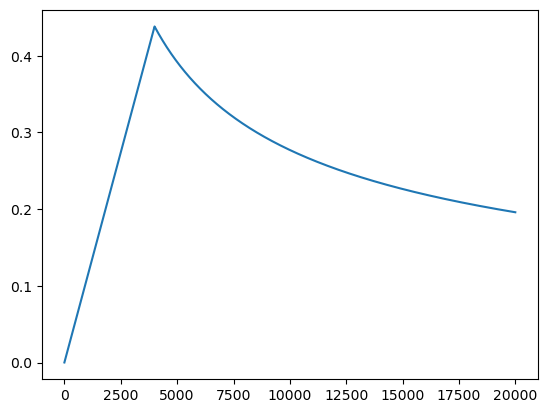

In [23]:
plt.plot(lr_list)